## 1、数据拆成5份并导出

In [1]:
import numpy as np
import pandas as pd

In [9]:
data=pd.read_excel("D:\\本基\\投稿\\结果\\allyz.xlsx")

In [10]:
data1=data[0:2960]
data2=data[2960:5919]
data3=data[5919:8878]
data4=data[8878:11837]
data5=data[11837:14797]

In [11]:
train1=pd.concat([data2,data3,data4,data5],ignore_index=False)
train2=pd.concat([data1,data3,data4,data5],ignore_index=False)
train3=pd.concat([data1,data2,data4,data5],ignore_index=False)
train4=pd.concat([data1,data2,data3,data5],ignore_index=False)
train5=pd.concat([data1,data2,data3,data4],ignore_index=False)

In [12]:
train1.to_csv("D:\\本基\\投稿\\结果\\train1.csv")
train2.to_csv("D:\\本基\\投稿\\结果\\train2.csv")
train3.to_csv("D:\\本基\\投稿\\结果\\train3.csv")
train4.to_csv("D:\\本基\\投稿\\结果\\train4.csv")
train5.to_csv("D:\\本基\\投稿\\结果\\train5.csv")
data1.to_csv("D:\\本基\\投稿\\结果\\test1.csv")
data2.to_csv("D:\\本基\\投稿\\结果\\test2.csv")
data3.to_csv("D:\\本基\\投稿\\结果\\test3.csv")
data4.to_csv("D:\\本基\\投稿\\结果\\test4.csv")
data5.to_csv("D:\\本基\\投稿\\结果\\test5.csv")

In [13]:
print(train1.shape,train2.shape,train3.shape,train4.shape,train5.shape)
print(data1.shape,data2.shape,data3.shape,data4.shape,data5.shape)

(11837, 8) (11838, 8) (11838, 8) (11838, 8) (11837, 8)
(2960, 8) (2959, 8) (2959, 8) (2959, 8) (2960, 8)


## 2、包的导入及数据读取准备

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings  # 警告处理

#from sklearn.linear_model.coordinate_descent import ConvergenceWarning  # 警告处理
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV  # 回归模型
from sklearn.tree import DecisionTreeRegressor  # 回归决策树模型
from sklearn.model_selection import train_test_split  # 数据分割
from sklearn.preprocessing import MinMaxScaler  # 数据归一化 (分类)
from sklearn.preprocessing import StandardScaler  # 数据归一化(回归)

from sklearn import tree
from sklearn.decomposition import PCA  # 主成分分析
from sklearn.pipeline import Pipeline  # 管道
from sklearn.model_selection import GridSearchCV  # 网格搜索交叉验证，用于选择最优的参数

from sklearn.preprocessing import label_binarize  # 数据二值化
from sklearn.decomposition import PCA  # 降维
from sklearn.ensemble import RandomForestClassifier  # 分类随机森林模型
from sklearn.ensemble import RandomForestRegressor  # 回归随机森林模型
from sklearn import metrics  # ROC/AUC

In [2]:
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
# 拦截异常
#warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:
train=pd.read_csv('all.csv')
test=pd.read_csv('all.csv')
#所有列都进入决策
train=train[['category','lnfans', 'lnlikes', 'lnviewers_y','date', 'count', 'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']]
test=test[['category','lnfans', 'lnlikes', 'lnviewers_y','date', 'count', 'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']]

# 2.数据处理
train[np.isinf(train)]=np.nan
train=train.dropna(axis=0,how='any')
train = train.values
#print(train)

test[np.isinf(test)]=np.nan
test=test.dropna(axis=0,how='any')
test = test.values
#print(test)

# 3.数据分割
X_train, Y_train = np.split(train, (10,), axis=1)
X_test,Y_test=np.split(test, (10,), axis=1)
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (X_train.shape[0], X_test.shape[0]))

'''# 4.数据归一化(回归)
from sklearn.preprocessing import StandardScaler  # 数据归一化(回归)
ss = StandardScaler()  # 创建归一化模型
X_train = ss.fit_transform(X_train, Y_train)  # 训练模型并转换数据
X_test = ss.transform(X_test)  # 转换数据'''


训练数据集样本数目：14797, 测试数据集样本数目：14797


'# 4.数据归一化(回归)\nfrom sklearn.preprocessing import StandardScaler  # 数据归一化(回归)\nss = StandardScaler()  # 创建归一化模型\nX_train = ss.fit_transform(X_train, Y_train)  # 训练模型并转换数据\nX_test = ss.transform(X_test)  # 转换数据'

## 3、决策树参数选择
### 以max_depth=10为最优

1深度，MSE：3.31176，训练R-square:0.34754，测试R-square:0.34754
2深度，MSE：1.97992，训练R-square:0.60993，测试R-square:0.60993
3深度，MSE：1.28333，训练R-square:0.74717，测试R-square:0.74717
4深度，MSE：0.72546，训练R-square:0.85708，测试R-square:0.85708
5深度，MSE：0.38047，训练R-square:0.92504，测试R-square:0.92504
6深度，MSE：0.19808，训练R-square:0.96098，测试R-square:0.96098
7深度，MSE：0.09843，训练R-square:0.98061，测试R-square:0.98061
8深度，MSE：0.04841，训练R-square:0.99046，测试R-square:0.99046
9深度，MSE：0.02264，训练R-square:0.99554，测试R-square:0.99554
10深度，MSE：0.01025，训练R-square:0.99798，测试R-square:0.99798
11深度，MSE：0.00458，训练R-square:0.99910，测试R-square:0.99910
12深度，MSE：0.00186，训练R-square:0.99963，测试R-square:0.99963
13深度，MSE：0.00070，训练R-square:0.99986，测试R-square:0.99986
14深度，MSE：0.00023，训练R-square:0.99996，测试R-square:0.99996
15深度，MSE：0.00007，训练R-square:0.99999，测试R-square:0.99999
16深度，MSE：0.00002，训练R-square:1.00000，测试R-square:1.00000
17深度，MSE：0.00000，训练R-square:1.00000，测试R-square:1.00000
18深度，MSE：0.00000，训练R-square:1.00000，测试R-square:1.00000
19深度，MSE：0.00000，训练

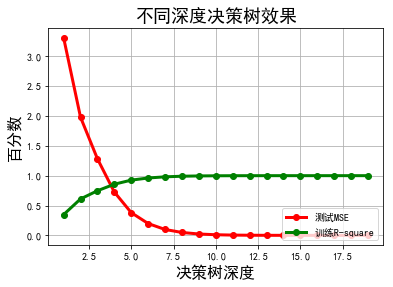

In [4]:
# 模型训构建，训练，评估
depths = np.arange(1, 20)
mse_list = []
R2_list = []
R2_test_list=[]

for d in depths:
    clf = DecisionTreeRegressor(criterion='mse', max_depth=d)  # max_depth决策树深度
    clf.fit(X_train, Y_train)
    Y_pred= clf.predict(X_test) #预测
    R2 = clf.score(X_train, Y_train) #计算训练R-square
    mse=(1-clf.score(X_test,Y_test))*(np.var(Y_test)) #计算测试MSE
    R2_test=clf.score(X_test,Y_test) #计算测试R-square
    mse_list.append(mse)
    R2_list.append(R2)
    R2_test_list.append(R2_test)
    print (u"%d深度，MSE：%.5f，训练R-square:%.5f，测试R-square:%.5f" % (d, mse,R2,R2_test))

plt.figure(facecolor='w')
plt.plot(depths, mse_list, 'ro-', lw=3,label='测试MSE')
plt.plot(depths, R2_list, 'go-', lw=3,label='训练R-square')
#plt.plot(depths, R2_test_list, 'bo-', lw=3,label='测试R-square')
plt.xlabel(u'决策树深度', fontsize=16)
plt.ylabel(u'百分数', fontsize=16)
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'不同深度决策树效果', fontsize=18)
plt.show()
#max_depth=10左右为最优

## 4、随机森林参数选择
### 以max_depth=8为最优

In [5]:
# 不同深度的随机森林建模并计算正确率、R方
from sklearn.ensemble import RandomForestRegressor  # 回归随机森林模型

depths = np.arange(1, 20)
mse_list = []
R2_list = []
R2_test_list=[]
for d in depths:
    clf = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=d)  # max_depth决策树深度
    clf.fit(X_train, Y_train)
    Y_pred= clf.predict(X_test) #预测
    R2 = clf.score(X_train, Y_train) #计算训练R-square
    mse=(1-clf.score(X_test,Y_test))*(np.var(Y_test)) #计算测试MSE
    R2_test=clf.score(X_test,Y_test) #计算测试R-square
    mse_list.append(mse)
    R2_list.append(R2)  
    R2_test_list.append(R2_test)
    #展示计算结果
    print ("%d深度，测试MSE%.5f，训练R-square:%.5f，测试R-square:%.5f" % (d,mse,R2,R2_test))


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


1深度，测试MSE3.25671，训练R-square:0.35839，测试R-square:0.35839


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


2深度，测试MSE1.82826，训练R-square:0.63981，测试R-square:0.63981


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


3深度，测试MSE1.11136，训练R-square:0.78105，测试R-square:0.78105


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


4深度，测试MSE0.53338，训练R-square:0.89492，测试R-square:0.89492


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


5深度，测试MSE0.22212，训练R-square:0.95624，测试R-square:0.95624


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


6深度，测试MSE0.08324，训练R-square:0.98360，测试R-square:0.98360


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


7深度，测试MSE0.03093，训练R-square:0.99391，测试R-square:0.99391


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


8深度，测试MSE0.01033，训练R-square:0.99796，测试R-square:0.99796


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


9深度，测试MSE0.00421，训练R-square:0.99917，测试R-square:0.99917


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


10深度，测试MSE0.00212，训练R-square:0.99958，测试R-square:0.99958


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


11深度，测试MSE0.00147，训练R-square:0.99971，测试R-square:0.99971


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


12深度，测试MSE0.00120，训练R-square:0.99976，测试R-square:0.99976


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


13深度，测试MSE0.00110，训练R-square:0.99978，测试R-square:0.99978


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


14深度，测试MSE0.00105，训练R-square:0.99979，测试R-square:0.99979


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


15深度，测试MSE0.00104，训练R-square:0.99980，测试R-square:0.99980


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


16深度，测试MSE0.00104，训练R-square:0.99980，测试R-square:0.99980


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


17深度，测试MSE0.00104，训练R-square:0.99980，测试R-square:0.99980


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


18深度，测试MSE0.00103，训练R-square:0.99980，测试R-square:0.99980


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


19深度，测试MSE0.00103，训练R-square:0.99980，测试R-square:0.99980


1深度，测试MSE3.25671，训练R-square:0.35839，测试R-square:0.35839
2深度，测试MSE1.82826，训练R-square:0.63981，测试R-square:0.63981
3深度，测试MSE1.11136，训练R-square:0.78105，测试R-square:0.78105
4深度，测试MSE0.53338，训练R-square:0.89492，测试R-square:0.89492
5深度，测试MSE0.22212，训练R-square:0.95624，测试R-square:0.95624
6深度，测试MSE0.08324，训练R-square:0.98360，测试R-square:0.98360
7深度，测试MSE0.03093，训练R-square:0.99391，测试R-square:0.99391
8深度，测试MSE0.01033，训练R-square:0.99796，测试R-square:0.99796
9深度，测试MSE0.00421，训练R-square:0.99917，测试R-square:0.99917
10深度，测试MSE0.00212，训练R-square:0.99958，测试R-square:0.99958
11深度，测试MSE0.00147，训练R-square:0.99971，测试R-square:0.99971
12深度，测试MSE0.00120，训练R-square:0.99976，测试R-square:0.99976
13深度，测试MSE0.00110，训练R-square:0.99978，测试R-square:0.99978
14深度，测试MSE0.00105，训练R-square:0.99979，测试R-square:0.99979
15深度，测试MSE0.00104，训练R-square:0.99980，测试R-square:0.99980
16深度，测试MSE0.00104，训练R-square:0.99980，测试R-square:0.99980
17深度，测试MSE0.00104，训练R-square:0.99980，测试R-square:0.99980
18深度，测试MSE0.00103，训练R-square:0.99980，测试R-square:0.99980
1

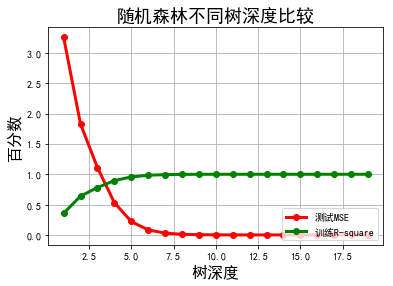

In [6]:
for d in depths:
    print ("%d深度，测试MSE%.5f，训练R-square:%.5f，测试R-square:%.5f" % (d,mse_list[d-1],R2_list[d-1],R2_test_list[d-1]))
## 画图
plt.figure(facecolor='w')
plt.plot(depths, mse_list, 'ro-', lw=3,label=u'测试MSE')
plt.plot(depths,R2_list,'go-',lw=3,label=u'训练R-square')
#plt.plot(depths, R2_test_list, 'bo-', lw=3,label=u'测试R-sqaure')
plt.xlabel(u'树深度', fontsize=16)
plt.ylabel(u'百分数', fontsize=16)
plt.legend(loc = 'lower right')
plt.grid(True)
plt.title(u'随机森林不同树深度比较', fontsize=18)
plt.show()
#max_depth=10的时候差不多最优

## 5、MAPE计算
### 第一折：
决策树测试集MAPE值：0.2328980564482833  
决策树训练集MAPE值：0.21705110049595422  
随机森林测试集MAPE值：0.23184710182717563  
随机森林训练集MAPE值：0.21603572411063135  
### 第二折：
决策树测试集MAPE值：0.21183559327361112  
决策树训练集MAPE值：0.22218319611111964  
随机森林测试集MAPE值：0.21098378422780376  
随机森林训练集MAPE值：0.22117757603024135  
### 第三折：
决策树测试集MAPE值：0.2099164867983621  
决策树训练集MAPE值：0.2227563914126502  
随机森林测试集MAPE值：0.20865102176912892  
随机森林训练集MAPE值：0.2217818997725544  
### 第四折：
决策树测试集MAPE值：0.21203228801711527  
决策树训练集MAPE值：0.222244899270639  
随机森林测试集MAPE值：0.21098181683250986  
随机森林训练集MAPE值：0.22121534529215373  
### 第五折：
决策树测试集MAPE值：0.23313733743321371  
决策树训练集MAPE值：0.21696453854817455  
随机森林测试集MAPE值：0.23178211246827582  
随机森林训练集MAPE值：0.21600742694663197  

In [16]:
train=pd.read_csv('train5.csv')
test=pd.read_csv('test5.csv')
#所有列都进入决策
train=train[['category','lnfans', 'lnlikes', 'lnviewers_y','date', 'count', 'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']]
test=test[['category','lnfans', 'lnlikes', 'lnviewers_y','date', 'count', 'lnviewers_x', 'sum', 'customer_unit_price', 'lnsales','lnsales_value']]

# 2.数据处理
train[np.isinf(train)]=np.nan
train=train.dropna(axis=0,how='any')
train = train.values
#print(train)

test[np.isinf(test)]=np.nan
test=test.dropna(axis=0,how='any')
test = test.values
#print(test)

# 3.数据分割
X_train, Y_train = np.split(train, (10,), axis=1)
X_test,Y_test=np.split(test, (10,), axis=1)
print ("训练数据集样本数目：%d, 测试数据集样本数目：%d" % (X_train.shape[0], X_test.shape[0]))

训练数据集样本数目：11837, 测试数据集样本数目：2960


In [17]:
##决策树
# 1、建立决策树模型、训练模型、作出预测
clf_0 = DecisionTreeRegressor(criterion='mse',max_depth=10)
clf_0.fit(X_train, Y_train)
y_0 = clf_0.predict(X_test)
y_1 = clf_0.predict(X_train)

# 2、计算测试集MAPE值
errors = abs(y_0 - Y_test) # 计算误差
mape = errors / Y_test  # mean absolute percentage error (MAPE)
mape=pd.DataFrame(mape)
mape[np.isinf(mape)]=np.nan
mape=mape.fillna(mape.mean())
mape=mape.values
print(u'决策树测试集MAPE值和NMSE值分别为')
print(np.mean(mape))

# 3、计算测试集NMSE值
a = (y_0 - Y_test)**2 # 分子
y=np.mean(Y_test)
b=(y_0-y)**2 # 分母
nmse=np.mean(a)/np.mean(b)
print(nmse)

# 4、计算训练集MAPE值
errors = abs(y_1 - Y_train) # 计算误差
mape = errors / Y_train  # mean absolute percentage error (MAPE)
mape=pd.DataFrame(mape)
mape[np.isinf(mape)]=np.nan
mape=mape.fillna(mape.mean())
mape=mape.values
print(u'决策树训练集MAPE值和NMSE值分别为')
print(np.mean(mape))

# 5、计算训练集NMSE值
a = (y_1 - Y_train)**2 # 分子
y=np.mean(Y_train)
b=(y_0-y)**2 # 分母
nmse=np.mean(a)/np.mean(b)
print(nmse)


##随机森林
# 1、建立随机森林模型、训练模型、作出预测
rf = RandomForestRegressor(n_estimators= 1000, random_state=42,max_depth=8)
rf.fit(X_train, Y_train)
predictions = rf.predict(X_test)
predictions1= rf.predict(X_train)

# 2、计算测试集MAPE值
errors = abs(predictions - Y_test) # 计算误差
mape = errors / Y_test # mean absolute percentage error (MAPE)
where_are_inf = np.isinf(mape)
mape[where_are_inf] = 0
print(u'随机森林测试集MAPE值和NMSE值分别为')
print(np.mean(mape))

# 3、计算测试集NMSE值
a = (predictions - Y_test)**2 # 分子
y=np.mean(Y_test)
b=(predictions-y)**2 # 分母
nmse=np.mean(a)/np.mean(b)
print(nmse)


# 2、计算训练集MAPE值
errors = abs(predictions1 - Y_train) # 计算误差
mape = errors / Y_train # mean absolute percentage error (MAPE)
where_are_inf = np.isinf(mape)
mape[where_are_inf] = 0
print(u'随机森林训练集MAPE值和NMSE值分别为')
print(np.mean(mape))

# 3、计算训练集NMSE值
a = (predictions1 - Y_train)**2 # 分子
y=np.mean(Y_train)
b=(predictions1-y)**2 # 分母
nmse=np.mean(a)/np.mean(b)
print(nmse)



D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


决策树测试集MAPE值和NMSE值分别为
0.23313733743321371
2.008766854447366


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in true_divide
D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide


决策树训练集MAPE值和NMSE值分别为
0.21696453854817455
1.975825196348761


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in true_divide


随机森林测试集MAPE值和NMSE值分别为
0.23178211246827582
2.036070285581824


D:\Anaconda_exe\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: divide by zero encountered in true_divide


随机森林训练集MAPE值和NMSE值分别为
0.21600742694663197
2.022764907248045
